# Deep Learning

### LeNet5
<br>with Thai digits handwritting

#### เตรียมข้อมูล

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle
data = pickle.load(open(r'C:\Users\User\Desktop\Super_AI\DL_NN\Dataset\thainumber_28.pkl','rb'))
X=data['X']
Y=data['Y']

In [3]:
print(X.shape)
print(len(np.unique(Y)))


(1665, 28, 28, 1)
10


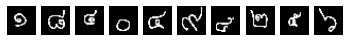

In [4]:
n = 10
for j,i in enumerate(np.random.choice(len(X),n)):
    plt.subplot(1,n,j+1)
    plt.imshow(X[i,:,:,0],cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
from skimage.transform import resize
_X = []
for x in X:
    _X.append(resize(x,(32,32)))
X = np.array(_X)
del _X

In [6]:
print(X)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

#### แบ่ง train | test

In [7]:
idx = np.random.permutation(np.arange(len(X)))
split = X.shape[0] * 8//10 # แบ่ง train 80 %
train_idx = idx[:split]
test_idx = idx[split:]
Xtrain,Ytrain = X[train_idx]/255.,Y[train_idx].astype(np.int)
Xtest,Ytest = X[test_idx]/255.,Y[test_idx].astype(np.int)

In [10]:
print(Xtrain.shape)
print(type(Xtrain))

(1332, 32, 32, 1)
<class 'numpy.ndarray'>


#### Training

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6,(5,5),input_shape=(32,32,1),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(16,(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
# MLP
model.add(tf.keras.layers.Dense(120,activation='relu'))
model.add(tf.keras.layers.Dense(84,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd')

In [11]:
model.fit(Xtrain,Ytrain,epochs=50)

Epoch 1/50
42/42 [==============================] - 7s 6ms/step - loss: 2.3011
Epoch 2/50
42/42 [==============================] - 0s 4ms/step - loss: 2.2820
Epoch 3/50
42/42 [==============================] - 0s 4ms/step - loss: 2.2623
Epoch 4/50
42/42 [==============================] - 0s 4ms/step - loss: 2.2317
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 2.1741
Epoch 6/50
42/42 [==============================] - 0s 4ms/step - loss: 2.0580
Epoch 7/50
42/42 [==============================] - 0s 4ms/step - loss: 1.8539
Epoch 8/50
42/42 [==============================] - 0s 4ms/step - loss: 1.6451A: 0s - loss: 1.645
Epoch 9/50
42/42 [==============================] - ETA: 0s - loss: 1.463 - 0s 3ms/step - loss: 1.4649
Epoch 10/50
42/42 [==============================] - 0s 3ms/step - loss: 1.3547
Epoch 11/50
42/42 [==============================] - 0s 4ms/step - loss: 1.2793
Epoch 12/50
42/42 [==============================] - 0s 3ms/step - loss: 1.2012
Epoch 

#### Predict

In [12]:
Z = model.predict(Xtest)
print(np.sum(Z.argmax(axis=1)==Ytest)/len(Z))

0.7597597597597597
